In [1]:
# Import the Boston Housing Data Set from Keras
from keras.datasets import boston_housing
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [2]:
class BostonRegression:
    def __init__(self):
        (train_data,train_targets),(test_data,test_targets) = boston_housing.load_data()
        self.train_data = train_data
        self.train_targets = train_targets
        self.test_data = test_data
        self.test_targets = test_targets
        print("Training Data Shape:, ", self.train_data.shape)
        print("Test Data Shape:, ", self.test_data.shape)
        print("Training Data Sample:\n", self.train_data[0])
        
    
    def normalize_data(self):
        # Normalize the data so that the model can learn patterns:
        # We subtract each value by their mean and divide it by the standard deviation.
        mean = self.train_data.mean(axis = 0)
        std = self.train_data.std(axis = 0)
        self.train_data -=mean
        self.train_data /=std
        self.test_data -=mean
        self.test_data /=std
    
    
    # Model Architecture
    def build_model(self):
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(self.train_data.shape[1],)))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        model.summary()
        return model
    
    
    def fit_model(self, model):
        history = model.fit(self.train_data, self.train_targets, epochs=2000, verbose=0)
        return history
    
    
    def test_model(self, model):
        mse_loss, mae_loss = model.evaluate(self.test_data, self.test_targets)
        print("Mean Squared Error:, ", mse_loss)
        print("Mean Absolute Error:, ", mae_loss)
    
    
    def predict_results(self, model, history):
        predictions = model.predict(self.test_data)
        predictions = predictions.reshape(predictions.shape[0])
        
        plt.plot(predictions, color='black')
        plt.plot(self.test_targets, color='blue', linestyle = 'None', marker='o')
        plt.title('Predictions')
        plt.legend(['predictions', 'test'], loc='upper left')
        plt.show()
        
        plt.plot(history.history['loss'], color='blue')
        plt.plot(history.history['mae'], color='green')
        plt.title('Loss')
        plt.legend(['mse', 'mae'], loc='upper left')
        plt.show()

In [3]:
models = BostonRegression()

Training Data Shape:,  (404, 13)
Test Data Shape:,  (102, 13)
Training Data Sample:
 [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [4]:
models.normalize_data()

In [5]:
model = models.build_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 7,169
Trainable params: 7,169
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = models.fit_model(model)

In [7]:
models.test_model(model)

102/102 [==============================] - 0s 396us/step
Mean Squared Error:,  14.336910771388634
Mean Absolute Error:,  2.5521674156188965


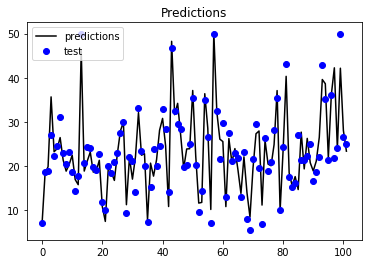

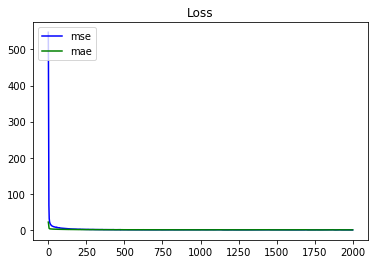

In [8]:
models.predict_results(model, history)